# Validating the implementation of a weakly compressible model in TRUST

In [1]:
from trustutils import run

run.introduction("Elie Saikali, Adrien Bruneton \& Ulrich Bieder")
run.description(
    "The present document aims at validating the weakly compressible problem implemented in TRUST. Unlike the quasi-compressible formulation, the weakly compressible approximation employs the total pressure in the equation of state (which is both time and space dependent). In this paper we show that such a formulation is necessary when the hydrostatic pressure is important as it can influence significantly the physical properties of the fluid; mainly the density which is calculated from a state equation. Such situation appears in a wide range of engineering applications; lets say the temperature stratification in the atmosphere or the underground gaz storage for example... We consider a simplified rectangular cavity of width 1m and height 100 m, filled with air at rest. A free outlet is considered at the bottom boundary $(y=0)$ to avoid any  pressurization phenomenon (fixed hydro-static pressure). The remaining boundaries are adiabatic (no-slip for NS). The thermo-dynamic pressure is fixed to 1 bar (10.e5 Pa). Four simulations are considered and thus described in what follows."
)
run.TRUST_parameters("1.8.4")

## Introduction 
 Validation made by : Elie Saikali, Adrien Bruneton \& Ulrich Bieder



 Report generated 27/01/2022

### Description 
The present document aims at validating the weakly compressible problem implemented in TRUST. Unlike the quasi-compressible formulation, the weakly compressible approximation employs the total pressure in the equation of state (which is both time and space dependent). In this paper we show that such a formulation is necessary when the hydrostatic pressure is important as it can influence significantly the physical properties of the fluid; mainly the density which is calculated from a state equation. Such situation appears in a wide range of engineering applications; lets say the temperature stratification in the atmosphere or the underground gaz storage for example... We consider a simplified rectangular cavity of width 1m and height 100 m, filled with air at rest. A free outlet is considered at the bottom boundary $(y=0)$ to avoid any  pressurization phenomenon (fixed hydro-static pressure). The remaining boundaries are adiabatic (no-slip for NS). The thermo-dynamic pressure is fixed to 1 bar (10.e5 Pa). Four simulations are considered and thus described in what follows.

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Verification_codage/QC_vs_WC/build)

In [2]:
from trustutils import run
run.addCase("QC", "Cas_QC.data") 
run.addCase("WC1", "Cas_WC.data")
run.addCase("WC2", "Cas_WC.data")
run.addCase("WC3", "Cas_WC.data")
run.addCase("WC1_vef", "Cas_WC.data")
run.addCase("WC2_vef", "Cas_WC.data")
run.addCase("WC3_vef", "Cas_WC.data")
run.printCases()
run.runCases()

### Test cases 
* QC/Cas_QC.data : 
* WC1/Cas_WC.data : 
* WC2/Cas_WC.data : 
* WC3/Cas_WC.data : 
* WC1_vef/Cas_WC.data : 
* WC2_vef/Cas_WC.data : 
* WC3_vef/Cas_WC.data : 


Running **with Sserver**...
  => A total of 7 cases were (successfully) run in 1065.0s.


## Quasi-compressible formulation

In order to illustrate the limitation of the quasi-compressible formulation in such a problem, we consider a uniform temperature (T) distribution in the cavity (equals to 333.15 K). This leads to a uniform density at the initial state (see figures 2.1 and 2.2). Since in the QC problem the constant/uniform thermo-dynamic pressure is used in the state equation, the temperature and rho fields remain constant till the steady state (see figures 2.3 and 2.4). This is WRONG and clearly shows the limitation of the QC model. 

### QC: T initial

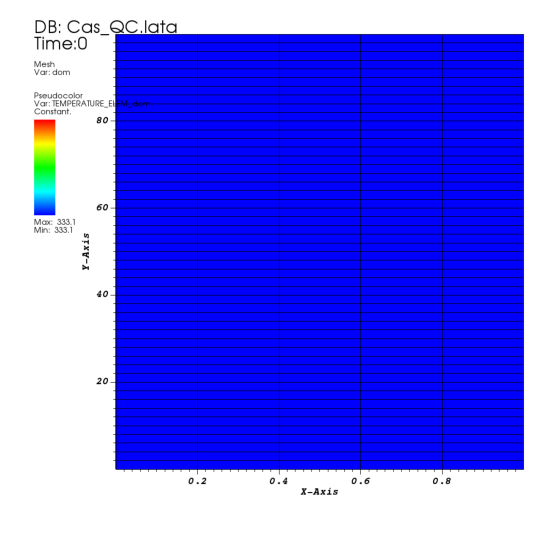

In [3]:
from trustutils import visit

visit.showField("QC/Cas_QC.lata","Pseudocolor","TEMPERATURE_ELEM_dom",time=0)

### QC: rho initial

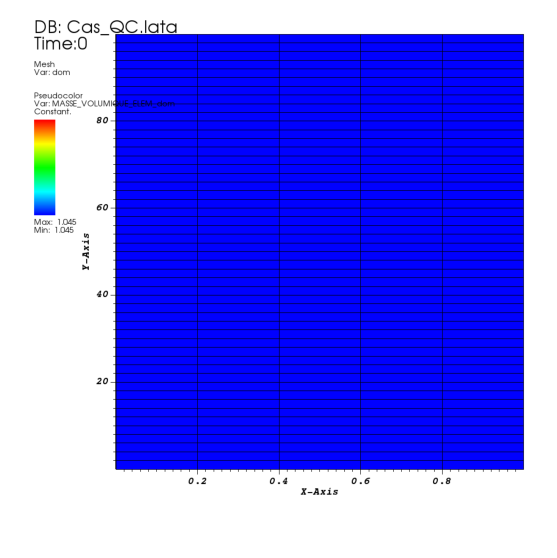

In [4]:
visit.showField("QC/Cas_QC.lata","Pseudocolor","MASSE_VOLUMIQUE_ELEM_dom",time=0)

### QC: T steady state

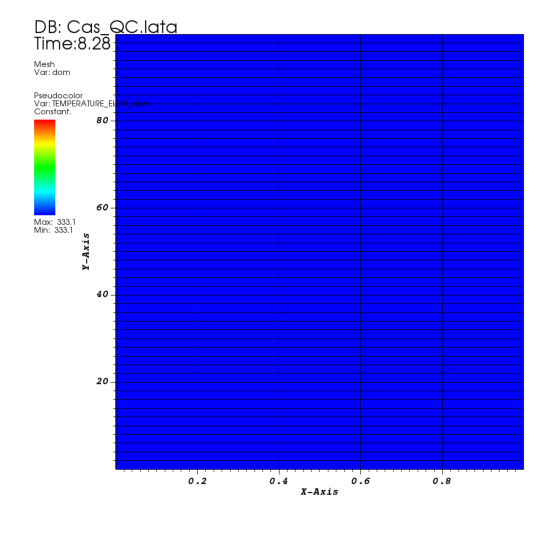

In [5]:
visit.showField("QC/Cas_QC.lata","Pseudocolor","TEMPERATURE_ELEM_dom")

### QC: rho steady state

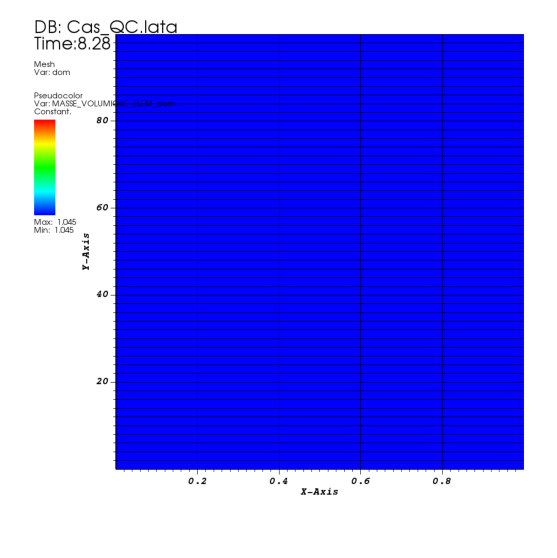

In [6]:
visit.showField("QC/Cas_QC.lata","Pseudocolor","MASSE_VOLUMIQUE_ELEM_dom")

## Weakly compressible formulation - Case 1

In the WC problem, several options are available for the pressure used in the state equation. In this test case we show that the WC problem is identical to the QC problem when the user defines the pressure independent of the hydro-static one (i.e: constant/uniform as in the QC). See figures 3.1-3.4 and compare with section 2 (same initial conditions are considered). This is also WRONG !

### WC - Case 1: T initial

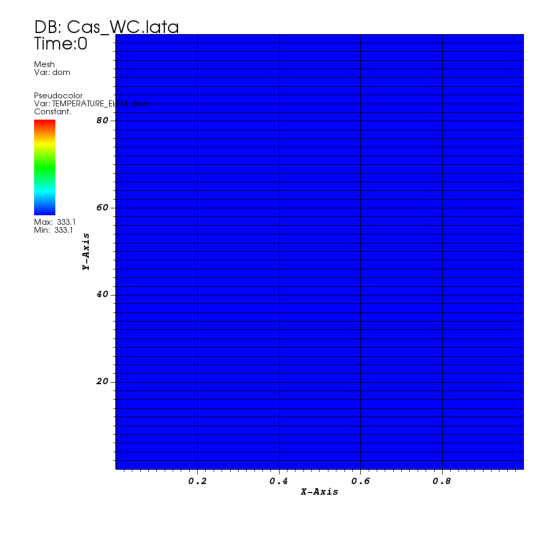

In [7]:
visit.showField("WC1/Cas_WC.lata","Pseudocolor","TEMPERATURE_ELEM_dom",time=0)

### WC - Case 1: rho initial

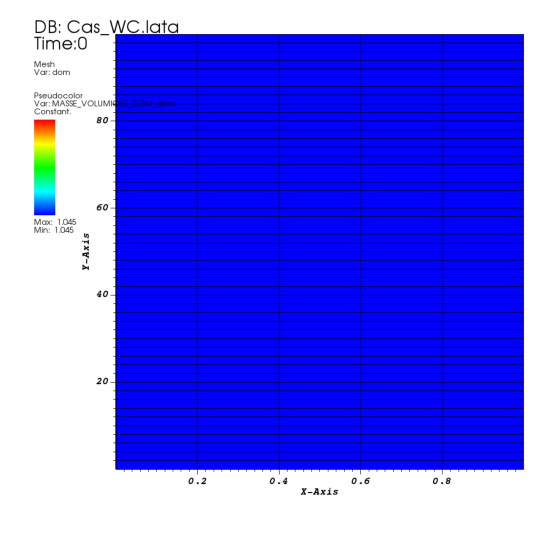

In [8]:
visit.showField("WC1/Cas_WC.lata","Pseudocolor","MASSE_VOLUMIQUE_ELEM_dom",time=0)

### WC - Case 1: T steady state

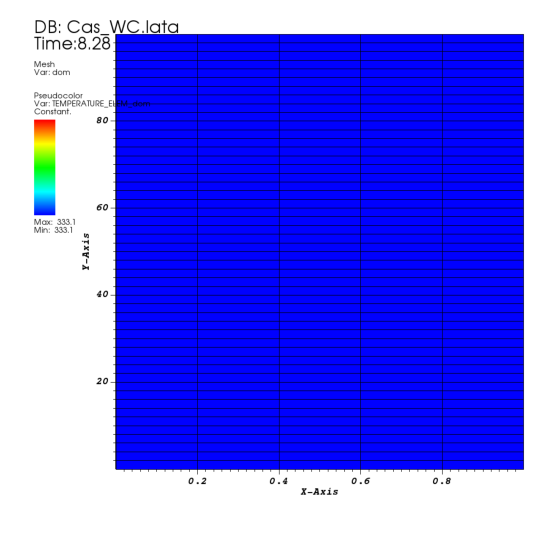

In [9]:
visit.showField("WC1/Cas_WC.lata","Pseudocolor","TEMPERATURE_ELEM_dom")

### WC - Case 1: rho steady state

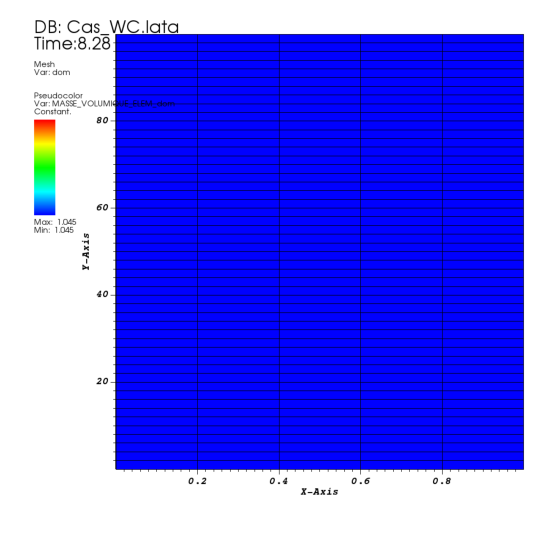

In [10]:
visit.showField("WC1/Cas_WC.lata","Pseudocolor","MASSE_VOLUMIQUE_ELEM_dom")

## Weakly compressible formulation - Case 2

In this test case, the pressure used in the state equation is the sum of the thermo-dynamic and the hydro-static ones. We consider the same initial conditions at the begining of the simulation (uniform T       and rho). As we see in figures 4.3 and 4.4, the expected solution is obtained, which is a perfect linear stratified profile (light at the top and heavier at the bottom. Clearly, the steady state is a bit longer compared to before (5000 vs 8 seconds !). The exact solution is depicted in figure 4.5 and the error (w.r.t. the temperature) in figure 4.6. The solution is now CORRECT !

### WC - Case 2: T initial

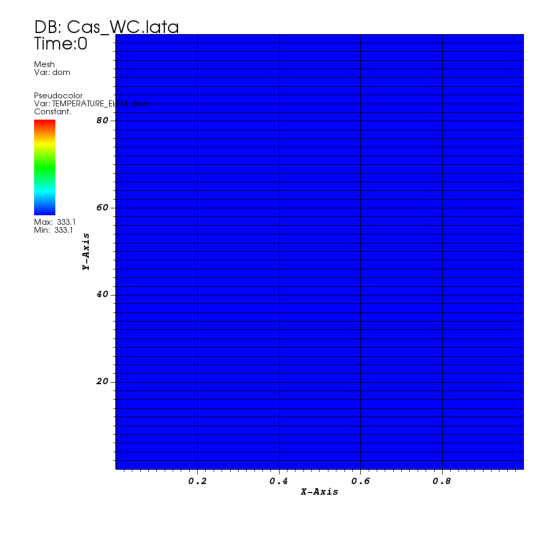

In [11]:
visit.showField("WC2/Cas_WC.lata","Pseudocolor","TEMPERATURE_ELEM_dom",time=0)

### WC - Case 2: rho initial

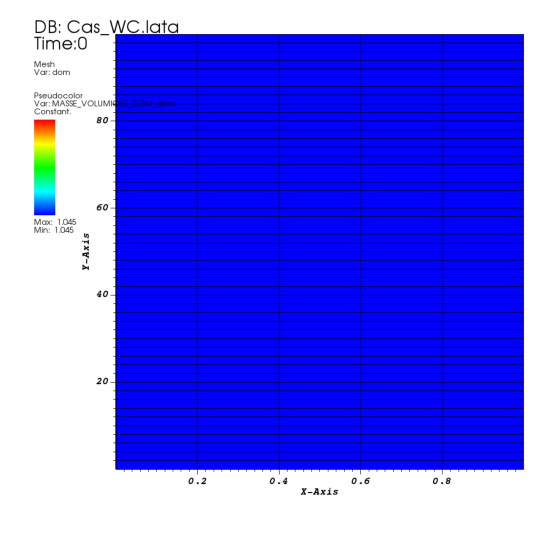

In [12]:
visit.showField("WC2/Cas_WC.lata","Pseudocolor","MASSE_VOLUMIQUE_ELEM_dom",time=0)

### WC - Case 2: T steady state

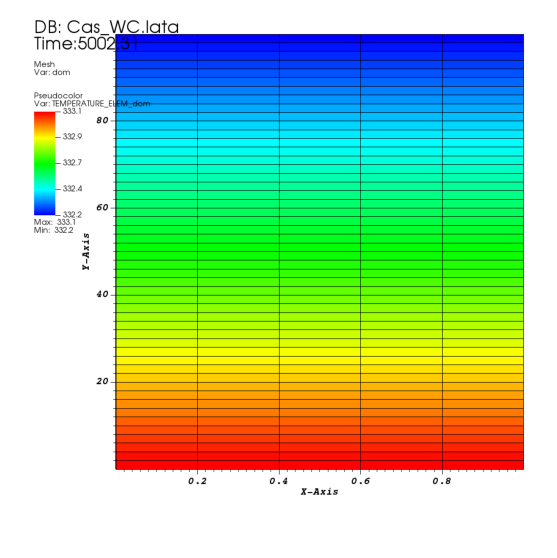

In [13]:
visit.showField("WC2/Cas_WC.lata","Pseudocolor","TEMPERATURE_ELEM_dom")

### WC - Case 2: rho steady state

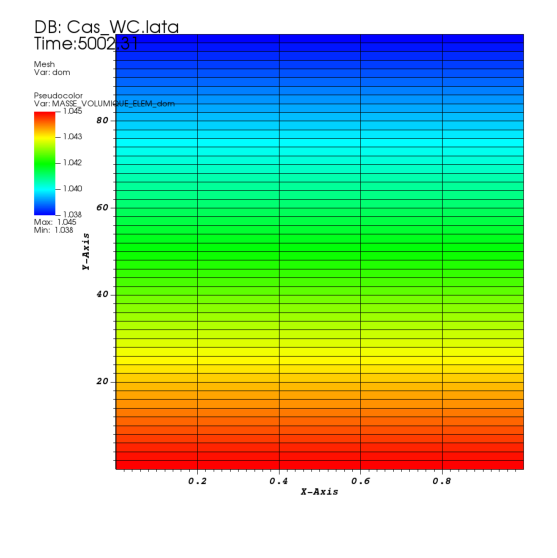

In [14]:
visit.showField("WC2/Cas_WC.lata","Pseudocolor","MASSE_VOLUMIQUE_ELEM_dom")

### WC - Case 2: T exact solution

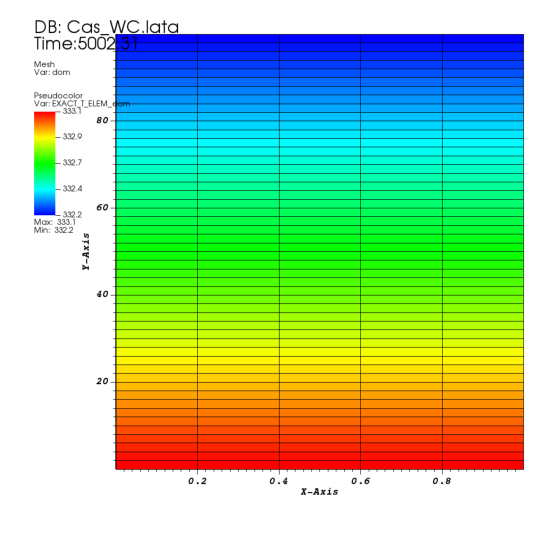

In [15]:
visit.showField("WC2/Cas_WC.lata","Pseudocolor","EXACT_T_ELEM_dom")

### WC - Case 2: T relative error

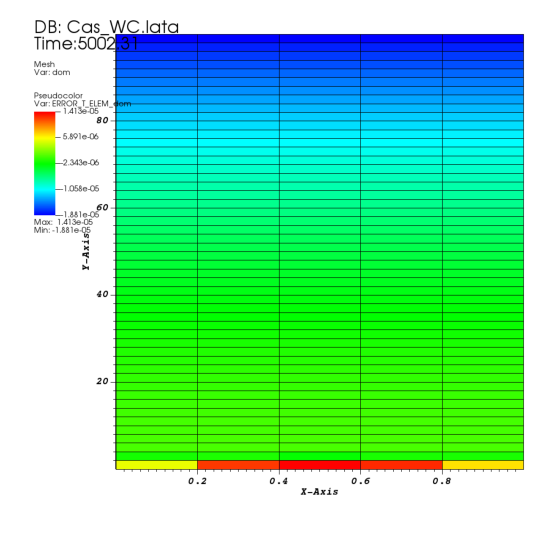

In [16]:
visit.showField("WC2/Cas_WC.lata","Pseudocolor","ERROR_T_ELEM_dom")

## Weakly compressible formulation - Case 3

In order to test further the WC problem, we consider in this test case a different initial condition (the pressure of the EOS is kept the same as the previous case). As shown in figure 5.1, a stratified initial condition is considered with a sharp gradient (100 K difference for the temperature). Note that this leads to a heavy fluid on the top of a light one at the initial state (see rho iso-contours in figure 5.2). Clearly, this will lead to instabilities (Reyleigh-Taylor) since the light fluid will move to the top. After a long steady state, we record the expected T and rho profiles shown in figures 5.3 and 5.4 (with the light fluid at the top !) Compared with the exact solution (figure 5.5) and the error (in 5.6), we can clearly note that the solution is now CORRECT ! This validates the weakly compressible formulation implemented in TRUST.

### WC - Case 3: T initial

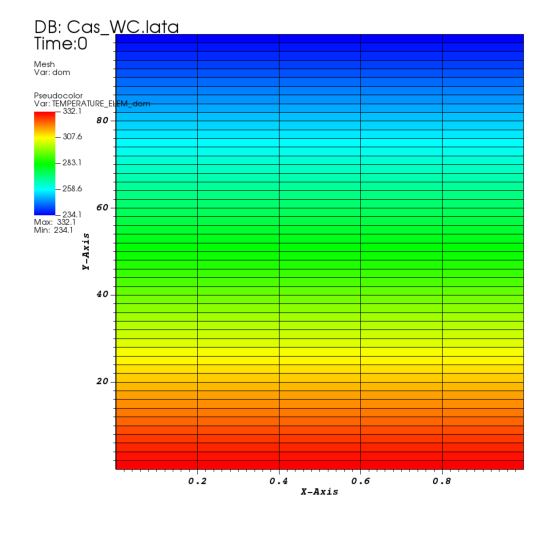

In [17]:
visit.showField("WC3/Cas_WC.lata","Pseudocolor","TEMPERATURE_ELEM_dom",time=0)

### WC - Case 3: rho initial

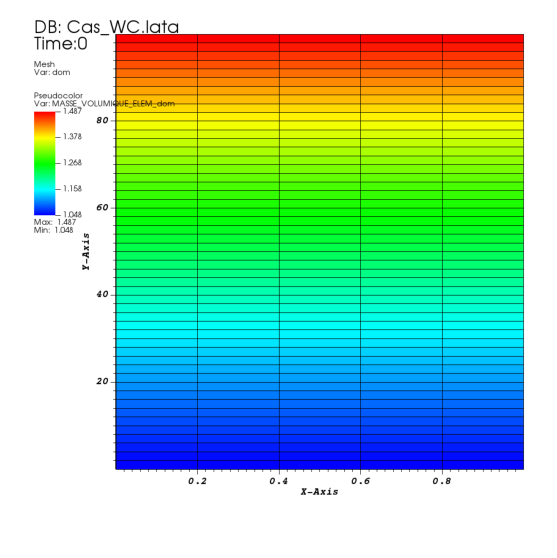

In [18]:
visit.showField("WC3/Cas_WC.lata","Pseudocolor","MASSE_VOLUMIQUE_ELEM_dom",time=0)

### WC - Case 3: T steady state

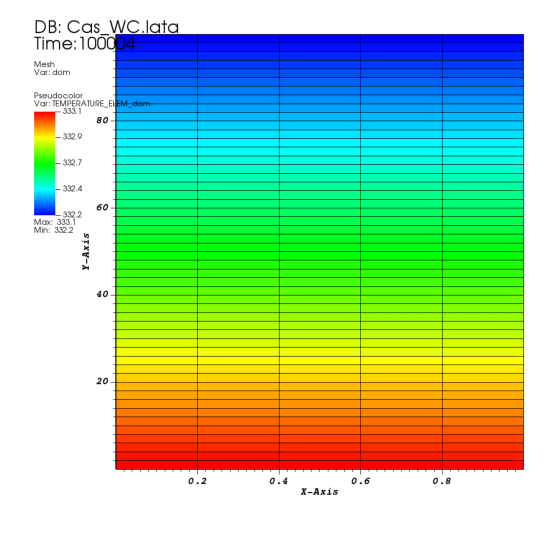

In [19]:
visit.showField("WC3/Cas_WC.lata","Pseudocolor","TEMPERATURE_ELEM_dom")

### WC - Case 3: rho steady state

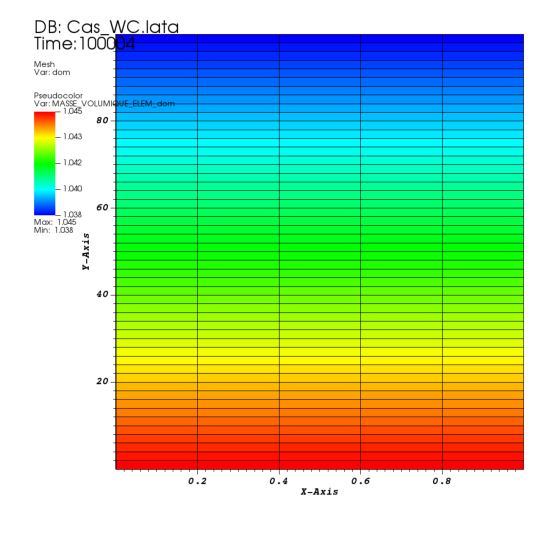

In [20]:
visit.showField("WC3/Cas_WC.lata","Pseudocolor","MASSE_VOLUMIQUE_ELEM_dom")

### WC - Case 3: T exact solution

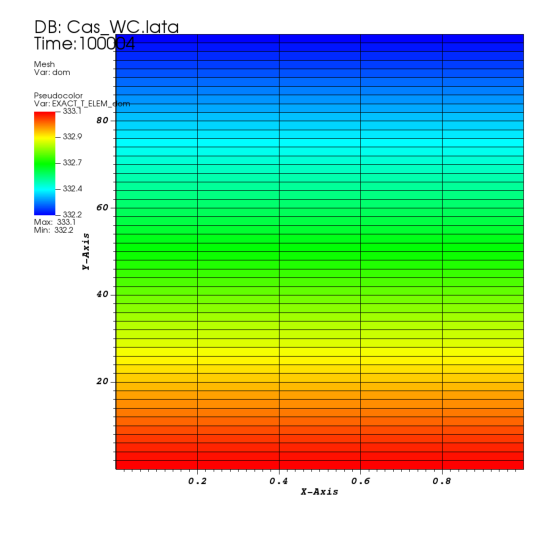

In [21]:
visit.showField("WC3/Cas_WC.lata","Pseudocolor","EXACT_T_ELEM_dom")

### WC - Case 3: T relative error

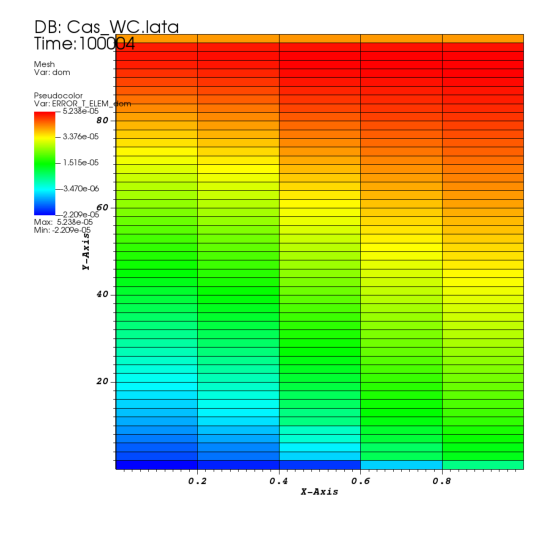

In [22]:
visit.showField("WC3/Cas_WC.lata","Pseudocolor","ERROR_T_ELEM_dom")

## Weakly compressible formulation - Case 1_vef

Same as Case 1 but in VEF.

### WC - Case 1_vef: T steady state

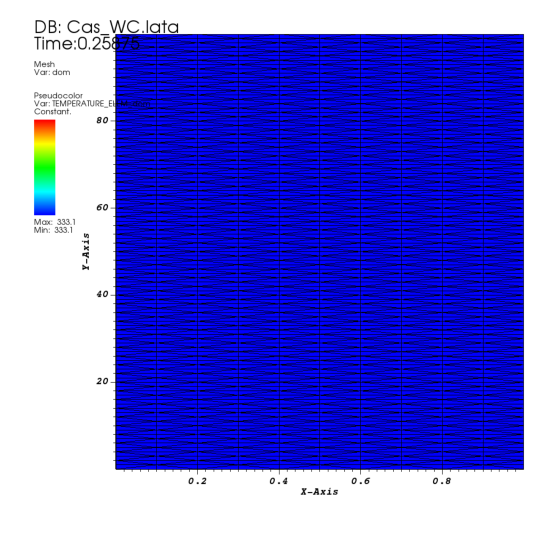

In [23]:
visit.showField("WC1_vef/Cas_WC.lata","Pseudocolor","TEMPERATURE_ELEM_dom")

### WC - Case 1_vef: rho steady state

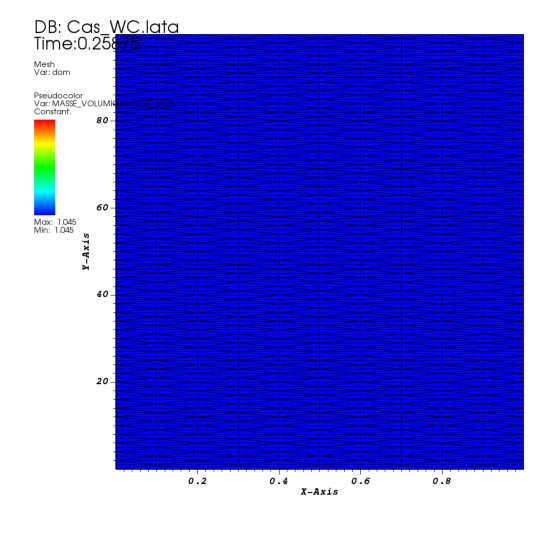

In [24]:
visit.showField("WC1_vef/Cas_WC.lata","Pseudocolor","MASSE_VOLUMIQUE_ELEM_dom")

## Weakly compressible formulation - Case 2_vef

Same as Case 2 but in VEF.

### WC - Case 2_vef: T steady state

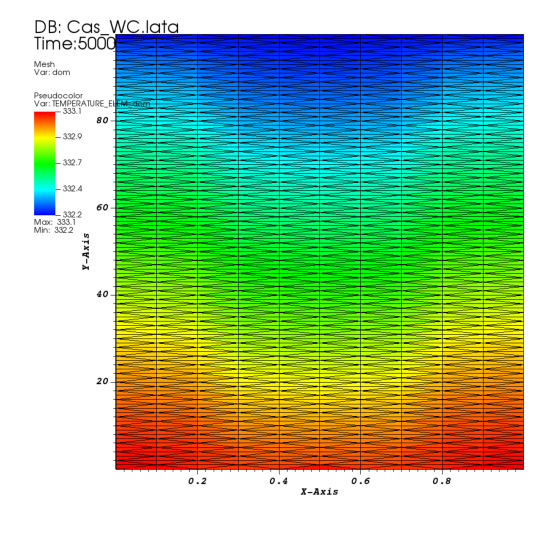

In [25]:
visit.showField("WC2_vef/Cas_WC.lata","Pseudocolor","TEMPERATURE_ELEM_dom")

### WC - Case 2_vef: rho steady state

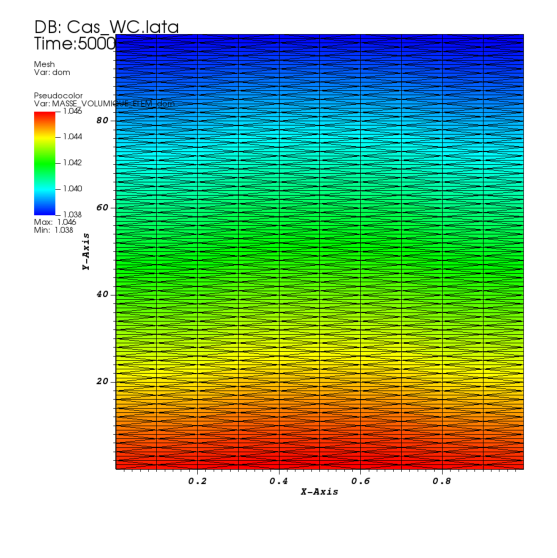

In [26]:
visit.showField("WC2_vef/Cas_WC.lata","Pseudocolor","MASSE_VOLUMIQUE_ELEM_dom")

### WC - Case 2_vef: T exact solution

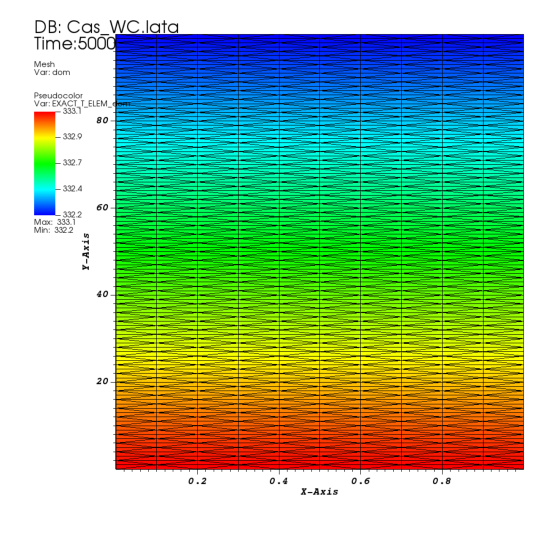

In [27]:
visit.showField("WC2_vef/Cas_WC.lata","Pseudocolor","EXACT_T_ELEM_dom")

### WC - Case 2_vef: T relative error

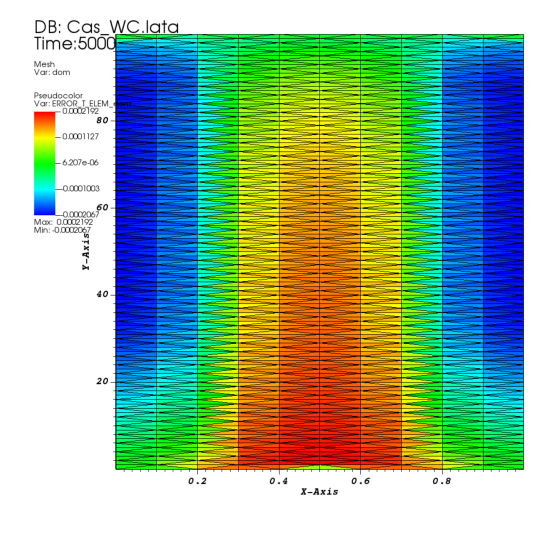

In [28]:
visit.showField("WC2_vef/Cas_WC.lata","Pseudocolor","ERROR_T_ELEM_dom")

## Weakly compressible formulation - Case 3_vef

Same as Case 3 but in VEF. ATTENTION : STEADY STATE IS NOT YET REACHED !!!!!!!!!

### WC - Case 3_vef: T steady state

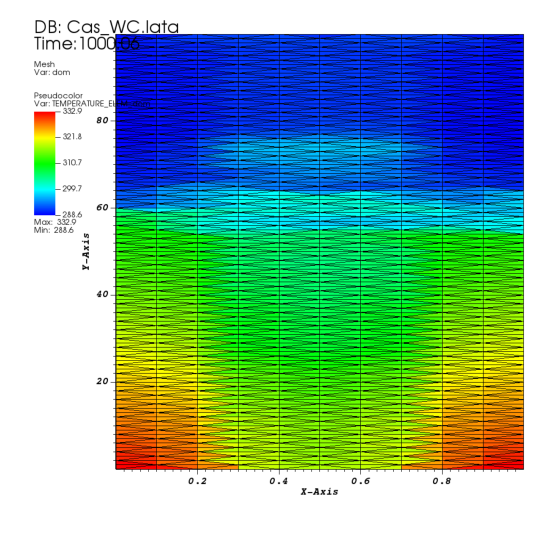

In [29]:
visit.showField("WC3_vef/Cas_WC.lata","Pseudocolor","TEMPERATURE_ELEM_dom")

### WC - Case 3_vef: rho steady state

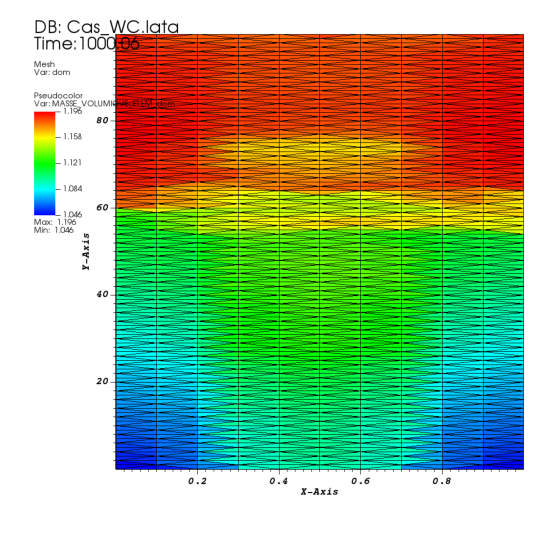

In [30]:
visit.showField("WC3_vef/Cas_WC.lata","Pseudocolor","MASSE_VOLUMIQUE_ELEM_dom")

### WC - Case 3_vef: T exact solution

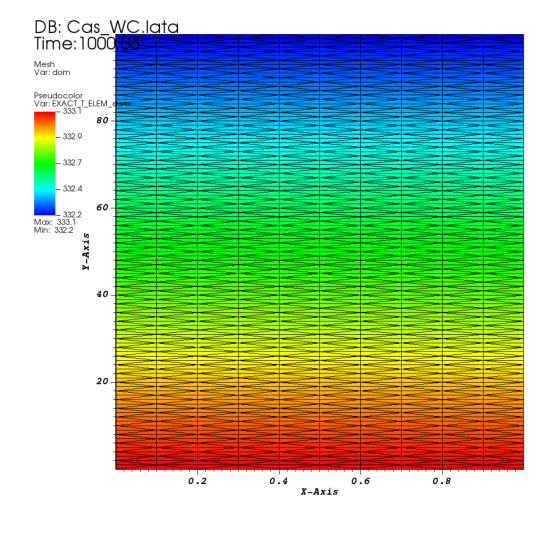

In [31]:
visit.showField("WC3_vef/Cas_WC.lata","Pseudocolor","EXACT_T_ELEM_dom")

### WC - Case 3_vef: T relative error

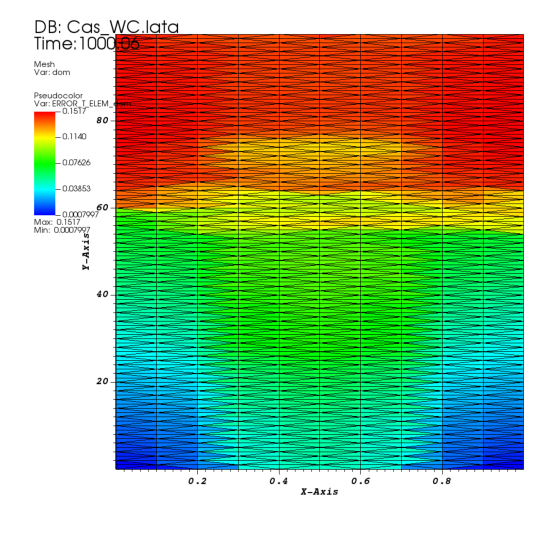

In [32]:
visit.showField("WC3_vef/Cas_WC.lata","Pseudocolor","ERROR_T_ELEM_dom")

## Conclusions

In this report we show that the weakly compressible formulation (implemented recently in TRUST) is required for simulations that deal with an important  hydro-static pressure (large altitudes). The results obtained in VDF and VEF match well with the exact solution even with different initial conditions for the temperature and density and thus validate the model implementation.

## Computer performance

In [33]:
run.tablePerf()

,host,system,Total CPU Time,CPU time/step,number of cells
QC/Cas_QC,is244522,Linux,0.014220,0.002028,250
WC1/Cas_WC,is244522,Linux,0.016782,0.0020005,250
WC2/Cas_WC,is244522,Linux,0.478475,0.000382461,250
WC3/Cas_WC,is244522,Linux,15.971500,0.000618329,250
WC1_vef/Cas_WC,is244522,Linux,0.138818,0.0516255,2000
WC2_vef/Cas_WC,is244522,Linux,668.227000,0.0171229,2000
WC3_vef/Cas_WC,is244522,Linux,1064.530000,0.0861524,2000
Total,,,1749.376795,,
